# No Show Medical Appointment 


** IMPORTANT OVERVIEW OF THE DATA SET:**
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

	✓	‘ScheduledDay’ tells us on what day the patient set up their appointment.
    
	✓	‘Neighbourhood’ indicates the location of the hospital.
    
	✓	‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
    
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

**WHAT THE PROJECT IS ABOUT. **

* This uses a csv file, data from kaggle called No show appointment. 

** BELOW ARE THE COLUMNS IN THE DATASET AND WHAT THEY MEAN : **
+ PatientId = ID of the patient
+ AppointmentID = ID of the appointment
+ Gender = Gender of patient
+ ScheduledDay = The day which appointment was scheduled
+ AppointmentDay = The day which appintment planned to occur
+ Age = Age of the patient
+ Neighbourhood = The place where hospital located
+ Scholarship = If the patient has scholarship or not, That is 1 for True and 0 for False
+ Hipertension = If the patient has Hipertension or not, That is 1 for True and 0 for False
+ Diabetes = If the patient has Diabetes or not, That is 1 for True and 0 for False
+ Alcoholism = If the patient has Alcoholism or not, That is 1 for True and 0 for False
+ Handcap = If the patient has Handcap or not. That is 1 for True and 0 for False
+ SMS_received = If the patient received an SMS for the appointment
+ No.show = no show information. “Yes” means patient did not come to the appointment, “No” means patient came to appointment.

** QUESTIONS TO BE INVESTIGATED WITH THIS DATA SET: **
+ what factors are important for us to know in order to predict if a patient will show up for their scheduled appointmment. 

+ what gender missed the most appointments ? 

+ what day of the week, do the patients mostly miss appointment. 



In [39]:
# import modules needed for the investigation 
%matplotlib inline
import numpy as np 
import pandas as pd
from datetime import datetime as dt 
import matplotlib.pyplot as plt

# import the data from the csv and assigned it to a variable called df 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()
# using the header shows us the first 5 roles from top of the data set. 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [40]:
# this is drop the missing values 
df_no_missing = df.dropna(axis = 1, how='any')
print df.describe()

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

In [41]:
df.columns    # this gives us the idea of the total columns we have in the data set. 

Index([u'PatientId', u'AppointmentID', u'Gender', u'ScheduledDay',
       u'AppointmentDay', u'Age', u'Neighbourhood', u'Scholarship',
       u'Hipertension', u'Diabetes', u'Alcoholism', u'Handcap',
       u'SMS_received', u'No-show'],
      dtype='object')

In [42]:
# Here i am renaming some columns to provide some clarity into the data
# like removing spaces
df.rename(columns = { "PatientId":'Patient_Id', 'Hipertension': 'Hypertension', \
                     "AppointmentID":'Appointment_ID',"ScheduledDay": "Scheduled_Day", \
                     'AppointmentDay': 'Appointment_Day' }, inplace=True)
df.columns = df.columns.str.replace('-', '_')
df.columns

Index([u'Patient_Id', u'Appointment_ID', u'Gender', u'Scheduled_Day',
       u'Appointment_Day', u'Age', u'Neighbourhood', u'Scholarship',
       u'Hypertension', u'Diabetes', u'Alcoholism', u'Handcap',
       u'SMS_received', u'No_show'],
      dtype='object')

In [43]:
# this is to present the total rows and the columns we have in the data set
df.shape
# reading from left to right, rows first and then column

(110527, 14)

In [44]:
df.info()
# this is showing more information about the data set like the type of data they are

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_Id         110527 non-null float64
Appointment_ID     110527 non-null int64
Gender             110527 non-null object
Scheduled_Day      110527 non-null object
Appointment_Day    110527 non-null object
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handcap            110527 non-null int64
SMS_received       110527 non-null int64
No_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [45]:
# Here we converted the date, time and seconds using pandas in built function to make the date and time more
# comprehensive to understand
# below is the link for the documentation 
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html#pandas.to_datetime
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])

In [46]:
df.head()

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**According to Youth Policy.org**,
Here is the source: *http://www.youthpolicy.org/factsheets/country/brazil/*
- 18 Years is considered to be the minimum for criminal reponsibility, 
+ In this analysis, i assuming that since 18 is the minimum age for responsibility, then 
the child is still a teenager and not yet responsible for this actions looking at from the economic perspective. 

Below i create a variable named Teens_start_age = 18,  WHY ? 
* This is because i want to assume that since they are kids and not yet responsible for themselves yet, they cannot visit the doctor or go for any medical appointment unless in Life threatening situations 

In [47]:
teens_start_age = 18 
teenagers = df[df.Age < teens_start_age]    # no of people below the age of 18
len(teenagers)
print "Here is the number of people below the age of 18 : " + str(len(teenagers))

Here is the number of people below the age of 18 : 27380


### In the next cell, I am taking a range from 18 to 40, 
+ people in this range are responsible and they can take care of themselves by law. 
+ a variable was created 40, i am using this as a max for people to have settled down


In [48]:
settled_down_age = 40   # to ask my mentor if i have to turn this into a function.
settling_down = df[(df['Age'] >= teens_start_age) & (df['Age'] <= settled_down_age)]
len(settling_down)
print "This is the number of people from 18 to 40 of the data set : " + str(len(settling_down))

This is the number of people from 18 to 40 of the data set : 33304


In [49]:
old_age = 60    # Here i looked at the age over 40 
getting_old = df[(df['Age'] > settled_down_age) & (df['Age'] <= old_age)]
len(getting_old)
print "This is the number of people over 40 till 60 years : " + str(len(getting_old))

This is the number of people over 40 till 60 years : 30081


In [50]:
finally_old = df[df.Age > old_age]    # Here i want to know the people above the age of 60 
len(finally_old)
print" Here is the nummber of people over 60 years : " + str(len(finally_old))

 Here is the nummber of people over 60 years : 19762


In [51]:
female_in_the_data = df[df.Gender == "F"]    # no of females in the gender columns
male_in_the_data = df[df.Gender == "M"]    # no of males in the gender columns 
len(male_in_the_data)
len(female_in_the_data)
print " Here is the number of Males : " + str(len(male_in_the_data))
print " Here is the number of Females : "+ str(len(female_in_the_data))

 Here is the number of Males : 38687
 Here is the number of Females : 71840


## Below is a simple for histogram of age of the people
+ The yellow line passing through it is called the line of best fit
+ Also we have the mean age of the people in the data set 
+ The standard deviation is included 

In [52]:
age_mean = df['Age'].mean() # mean of the age distribution 
age_standard_deviation = df['Age'].std() # standard deviation of the age distribution 
print 'This is the mean : ',age_mean
print 'This is the standard deviation : ',age_standard_deviation

This is the mean :  37.0888742117
This is the standard deviation :  23.1102049637


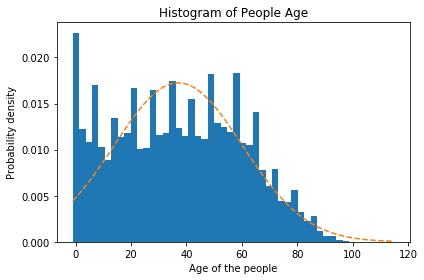

In [53]:
%matplotlib inline
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

mu = age_mean  # mean of distribution
sigma = age_standard_deviation  # standard deviation of distribution

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(df['Age'], num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Age of the people')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of People Age')
#$\mu=, $\sigma=$
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

# Question 1 
+ ####  what gender missed the most appointment ?
so here i am trying to consider both genders, 
I want to find out, which one missed the most appointment 



In [54]:
male_no_shows = df[(df['Gender'] == "M") & (df['No_show'] == 'Yes')]
males_no_shows = int(len(male_no_shows))
print "Male that did not show up for appointment : ",males_no_shows

Male that did not show up for appointment :  7725


In [55]:
# Here i am trying to get the female in the gender that did not show for the appointment
female_no_shows = df[(df['Gender'] == 'F') & (df['No_show'] == 'Yes')]
females_no_shows = int(len(female_no_shows))
print "Female that did not show up for appointment : ",females_no_shows

Female that did not show up for appointment :  14594


In [56]:
# Here, we are looking at the number of males that showed up 
male_shows_up = df[(df['Gender'] == "M") & (df['No_show'] == 'No')]
males_shows_up = int(len(male_shows_up))
print " Males that showed up for the appointment : ", males_shows_up

 Males that showed up for the appointment :  30962


In [57]:
#We are taking a look at the number of females that showed up for the appointment 
female_shows_up = df[(df['Gender'] == 'F') & (df['No_show'] == 'No')]
females_shows_up = int(len(female_shows_up))
print " Females that showed up for the Medical appointment: ",females_shows_up

 Females that showed up for the Medical appointment:  57246


### Below is a representation of Gender with No show 
+ to the left we have a pie chart representing the percentage of gender that show
+ To the right we have a pie chart also showing the percentage of gender that did not show

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c194e10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1120cadd0>], dtype=object)

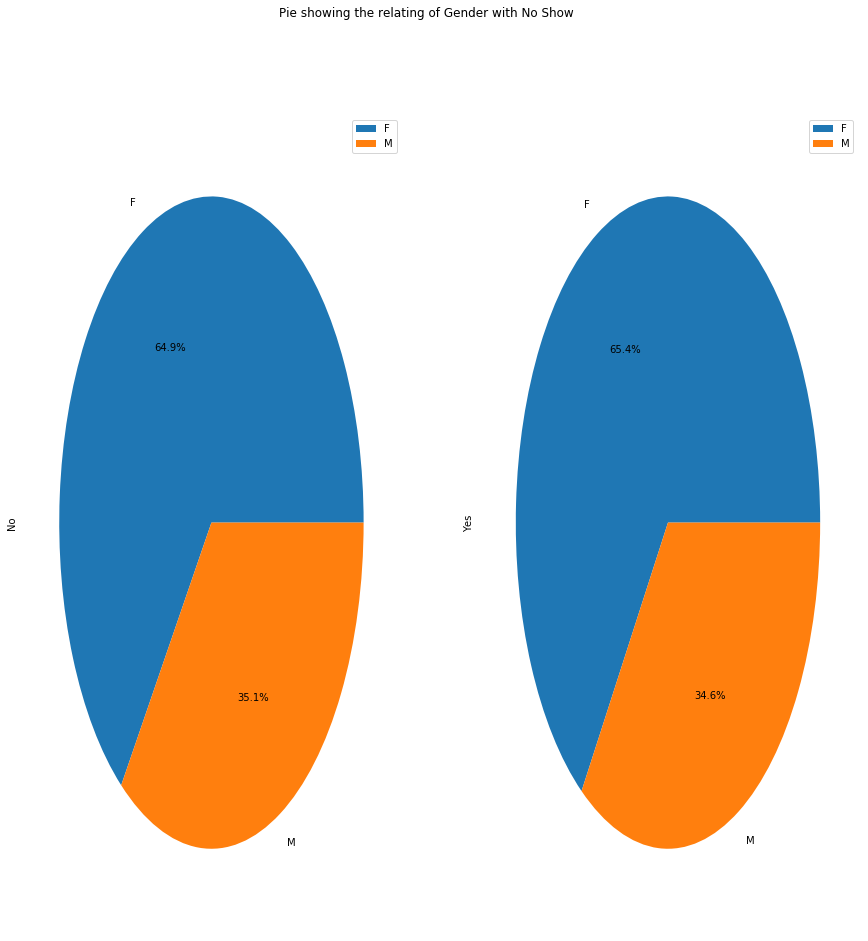

In [58]:
grouping_gender_noshow = df.groupby(['Gender','No_show'])
grouping_gender_noshow.size().unstack().plot(kind='pie', subplots = True, 
                                            autopct='%1.1f%%', figsize=(15,15)
                                            ,title = 'Pie showing the relating of Gender with No Show')

## Below is the bar chart representation of No show with Gender
+ the Blue bar shows the people that showed for the medical appointment 
+ the Orange bar shows the people that did not show for the medical appointment 

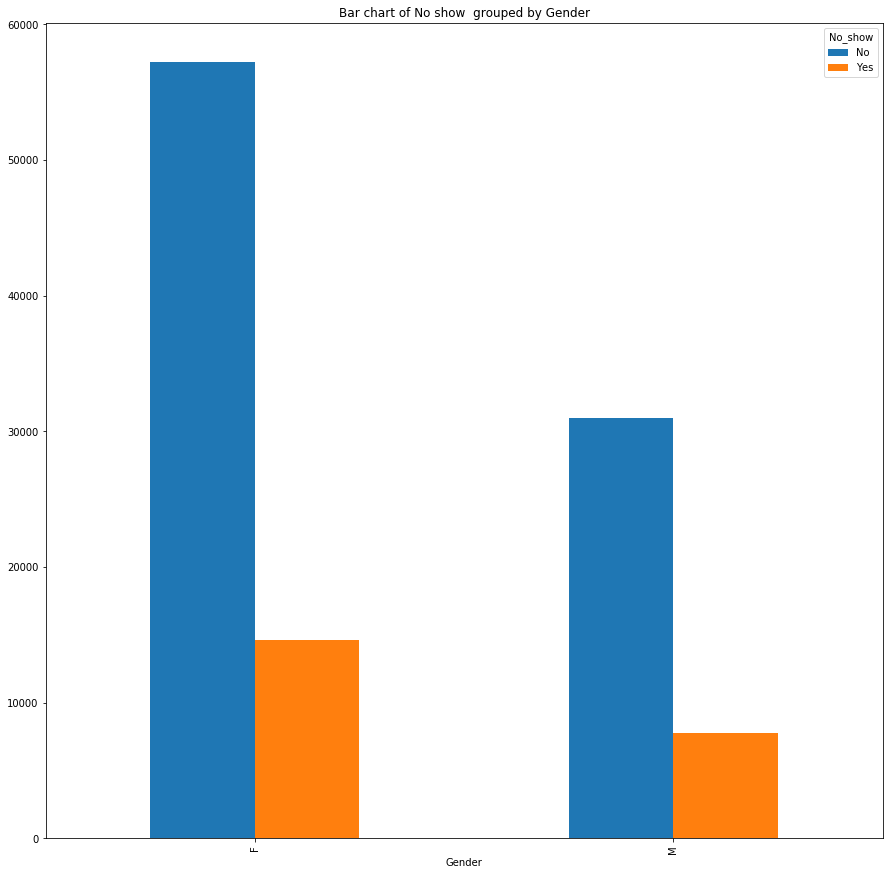

In [59]:
grouping_gender_noshow.size().unstack().plot(kind='bar', figsize=(15,15), title = 'Bar chart of No show  grouped by Gender')

### So my conclusion is that, 
+ *the number of Male that did not show up is 7725*
+ *Females that did not show up is 14594*

+ *This means that No of females that do not show up is higher than the number of male that do not show.*
+ *Looking at the analysis more, you will see that we have greater no of female that showed up too.*

## More analysis i will like to exlpore here :
+ To know the age range of male and females that showed and did not show up for the medical appointment.
+ I am suppecting that there could a hight numner of teens missing appointments because of thier guardian
+ Also the old people, little or no guardian to take them for the appointment
### So i am not concluding here but needs to be investigated further

In [60]:
from __future__ import division
percentage = 100
total_number_shows = len(df)
total_number_shows = int(total_number_shows)
def calculating_percentage(input_show):
    the_percentage = ((input_show / total_number_shows)*percentage)
    print the_percentage,'%'

male_not_showed = calculating_percentage(males_no_shows)
female_not_showed = calculating_percentage(females_no_shows)
male_that_showed = calculating_percentage(males_shows_up)
female_that_showed = calculating_percentage(females_shows_up)

6.98924244755 %
13.204013499 %
28.013064681 %
51.7936793725 %


# QUESTION 2 : 
+ #### what day of the week did people missed the most appointment 

+ Below is the next cell, i formatted the Appointment_day to days in the week so that i can get the day of the week. 

In [61]:
df['Day_of_the_appointment'] = df['Appointment_Day'].dt.weekday_name    # the day of the week was formatted here

In [62]:
Monday_Appointment = df[(df['Day_of_the_appointment'] == 'Monday')]
len(Monday_Appointment)

22715

In [63]:
def checking_for_days(appointment_day, day_of_week):
    appointment = df[(appointment_day == day_of_week)]
    print day_of_week+'s : ' + str(len(appointment))
    return len(appointment)
    
max_of_days = [
    checking_for_days(df['Day_of_the_appointment'], 'Monday'),
    checking_for_days(df['Day_of_the_appointment'], 'Tuesday'),
    checking_for_days(df['Day_of_the_appointment'], 'Wednesday'),
    checking_for_days(df['Day_of_the_appointment'], 'Thursday'),
    checking_for_days(df['Day_of_the_appointment'], 'Friday'),
    checking_for_days(df['Day_of_the_appointment'], 'Saturday'),
    checking_for_days(df['Day_of_the_appointment'], 'Sunday')
]
# returning the number of appointment missed based on the weekday
print 'Here is the most days where appointment was missed : ', max(max_of_days)

Mondays : 22715
Tuesdays : 25640
Wednesdays : 25867
Thursdays : 17247
Fridays : 19019
Saturdays : 39
Sundays : 0
Here is the most days where appointment was missed :  25867


In [64]:
# People missed most appointment on a Wednesday
df['Day_of_the_appointment'].mode()

0    Wednesday
dtype: object

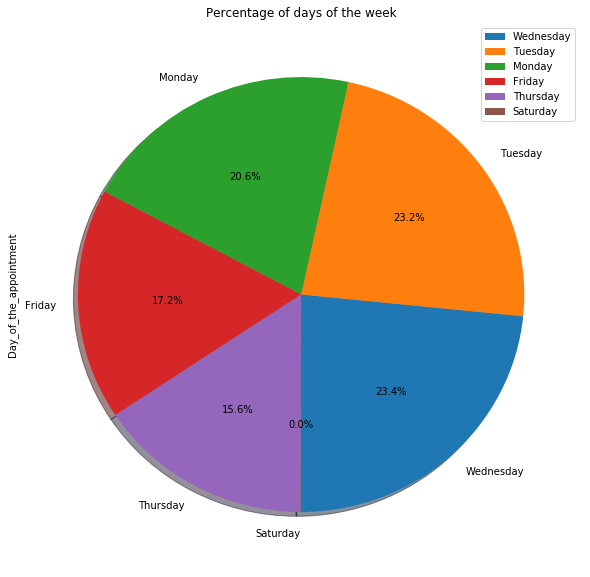

In [65]:
%matplotlib inline
df['Day_of_the_appointment'].value_counts().plot(kind="pie", shadow = True, startangle=270, autopct='%1.1f%%', figsize=(10,10),
                                                 title = ('Percentage of days of the week'), legend = True)

The above pie chart shows the percentage of how the days of the week appears. 

### What do i mean by this ? 
+ each variables shows how many times each day occurred in the data set. <br>
However note that i wanted to see which of the days of the week that the people missed the most appointment, <br>
and given the looks of things on the pie chart we can see the percentages of how they occur.


+ **Monday** with 20.6%
+ **Tuesday** with 23.2%
+ **Wednesday** with 23.4%
+ **Thurday** with 15.6%
+ **Friday** with 17.2%
+ **Satuday** with 0%

*From pie chart analysis what i can deduce is that, the people missed their appointment most on Wednesday, slightly a bit more than Tuesday. *
### The reason for checking this: 
+ I wanted to know if the reason for missing the appointment could be work related or not, 
What i would like to explore more here is that : What is the percentage of the working class and the non working class in this analysis
in order to better understand the result.  

Text(0,0.5,u'Frequency')

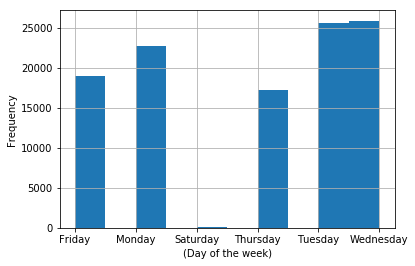

In [66]:
ax = df['Day_of_the_appointment'].hist()
ax.set_xlabel("(Day of the week)")
ax.set_ylabel('Frequency')

# Further analysis to be done.........
+ to investigate why there is a high number of people missing the medical appointment.
*This is my own opinion requires a Machine learning model to be to predict if a patient will miss the appoitnment or not *
+ Also, the scholarship program in this data set needs to be investigated, as i think that the people would misses the appointment may be related to the non-availability of the scholarship.
+ The sms data needs to be analysed as it could also be that they have forgotten about the medical appointment 